#### Pacotes importados para manipulação dos dados

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

##### Importação dos dados

In [2]:
sample_submission = pd.read_csv('dados/taxi-sample-submission.csv')
submission = pd.read_csv('dados/taxi-submission.csv')
taxi_train = pd.read_csv('dados/taxi-train.csv')

#### Tratamento

In [3]:
taxi_train.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location,ride_date
0,5c41b7afe9da0d7fbe60dc0e925975b832375a3c,efd204f38a83a59df5bf4a1fe004aa291183e235ee40ee...,2016-02-07 01:45:00+00:00,2016-02-07 01:45:00+00:00,360.0,0.0,1.703108e+10,1.703108e+10,8.0,8.0,...,8.50,Credit Card,Northwest Management LLC,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.900221,-87.629105,POINT (-87.6291051864 41.9002212967),2016-02-07
1,9333962b69bef1506be0b0a7edbd1d6626edd6ab,1a1189d1e9f4f676bbeaf49903912684b94453576a234f...,2013-05-08 19:15:00+00:00,2013-05-08 19:30:00+00:00,840.0,5.4,NaN,NaN,NaN,NaN,...,13.85,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-08
2,6329807d0ad342bfe6671b2553592edadfd742b6,25e9bbb9704eb82311a4d4036baba6451cd27138c4d6eb...,2013-02-17 12:30:00+00:00,2013-02-17 12:30:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,...,52.38,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-17
3,049949c0f58cc75d58ef9faf8ba4030c6ef0cf34,8b8b185d8a60ac5edd94c0494d0b9b9c9c86d54c0ab3dd...,2014-11-09 10:45:00+00:00,2014-11-09 11:00:00+00:00,540.0,1.6,NaN,NaN,6.0,3.0,...,9.55,Credit Card,NaN,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),2014-11-09
4,4554e53540678f18384d5fcd6d42623ccc60d6e2,73b2f5adecea91eeef3900303a07f1b0519a594cffb6b0...,2019-04-13 20:00:00+00:00,2019-04-13 20:00:00+00:00,577.0,1.5,1.703184e+10,1.703108e+10,32.0,8.0,...,11.25,Credit Card,Chicago Taxicab,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2019-04-13


In [6]:
taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_key              30000 non-null  object 
 1   taxi_id                 29998 non-null  object 
 2   trip_start_timestamp    30000 non-null  object 
 3   trip_end_timestamp      29996 non-null  object 
 4   trip_seconds            29805 non-null  float64
 5   trip_miles              30000 non-null  float64
 6   pickup_census_tract     19663 non-null  float64
 7   dropoff_census_tract    19559 non-null  float64
 8   pickup_community_area   26445 non-null  float64
 9   dropoff_community_area  25919 non-null  float64
 10  fare                    29999 non-null  float64
 11  tips                    29999 non-null  float64
 12  tolls                   24933 non-null  float64
 13  extras                  29999 non-null  float64
 14  trip_total              29999 non-null

In [4]:
taxi_train.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,29805.000000,30000.000000,1.966300e+04,1.955900e+04,26445.000000,25919.000000,29999.000000,29999.000000,24933.000000,29999.000000,29999.000000,26449.000000,26449.000000,26007.000000,26007.000000
mean,798.112833,3.237427,1.703138e+10,1.703136e+10,23.859217,21.947375,12.872966,1.402873,0.001043,0.867869,15.191000,41.901371,-87.659851,41.901145,-87.655315
std,1507.877805,6.297811,3.431865e+05,3.375077e+05,20.037496,18.160866,12.289114,2.640751,0.055194,2.742169,15.147028,0.039336,0.073250,0.039685,0.061020
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.673820,-87.913625,41.660136,-87.913625
25%,310.000000,0.200000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.655998,41.880994,-87.655998
50%,540.000000,1.190000,1.703128e+10,1.703128e+10,24.000000,22.000000,8.050000,0.000000,0.000000,0.000000,9.650000,41.892073,-87.632746,41.892508,-87.633308
75%,960.000000,3.000000,1.703184e+10,1.703183e+10,32.000000,32.000000,13.500000,2.000000,0.000000,1.000000,15.450000,41.914616,-87.626211,41.921701,-87.626211
max,86386.000000,247.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,269.850000,63.000000,4.000000,99.500000,274.350000,42.009623,-87.534903,42.015934,-87.540936


In [13]:
taxi_train.isnull().sum()[taxi_train.isnull().sum() > 0] #a primeira parte pega todas as colunas e soma cada campo e
                                                    # a segunda parte mostra só as colunas q contém 1 ou mais valores

taxi_id                       2
trip_end_timestamp            4
trip_seconds                195
pickup_census_tract       10337
dropoff_census_tract      10441
pickup_community_area      3555
dropoff_community_area     4081
fare                          1
tips                          1
tolls                      5067
extras                        1
trip_total                    1
company                    5171
pickup_latitude            3551
pickup_longitude           3551
pickup_location            3551
dropoff_latitude           3993
dropoff_longitude          3993
dropoff_location           3993
dtype: int64

In [15]:
print(f'dataset total: {taxi_train.shape}')
print(f'dataset sem NA: {taxi_train.dropna().shape}')

dataset total: (30000, 24)
dataset sem NA: (12986, 24)


In [16]:
taxi_sem_nulos = taxi_train.copy()

In [24]:
for coluna in taxi_train.columns:
    taxi_sem_nulos[coluna] = taxi_sem_nulos[coluna].fillna(taxi_sem_nulos[coluna].mode()[0])

In [25]:
print(f"tamanho do dataset sem nulos: {taxi_sem_nulos.shape} \n")
taxi_sem_nulos.isnull().sum()[taxi_sem_nulos.isnull().sum() > 0] 

tamanho do dataset sem nulos: (30000, 24) 



Series([], dtype: int64)

In [32]:
taxi_sem_nulos.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,792.925100,3.237427,1.703154e+10,1.703153e+10,21.979900,20.050067,12.872645,1.402827,0.000867,0.867840,15.190602,41.898959,-87.656643,41.898463,-87.652311
std,1504.336924,6.297811,3.545074e+05,3.539573e+05,19.498597,17.544597,12.289035,2.640719,0.050319,2.742128,15.146933,0.037517,0.069333,0.037579,0.057329
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.673820,-87.913625,41.660136,-87.913625
25%,300.000000,0.200000,1.703108e+10,1.703108e+10,8.000000,8.000000,6.000000,0.000000,0.000000,0.000000,7.000000,41.880994,-87.651062,41.880994,-87.655879
50%,540.000000,1.190000,1.703184e+10,1.703184e+10,8.000000,8.000000,8.050000,0.000000,0.000000,0.000000,9.650000,41.891972,-87.632746,41.891972,-87.632746
75%,960.000000,3.000000,1.703184e+10,1.703184e+10,32.000000,32.000000,13.500000,2.000000,0.000000,1.000000,15.450000,41.902788,-87.626215,41.907492,-87.626215
max,86386.000000,247.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,269.850000,63.000000,4.000000,99.500000,274.350000,42.009623,-87.534903,42.015934,-87.540936


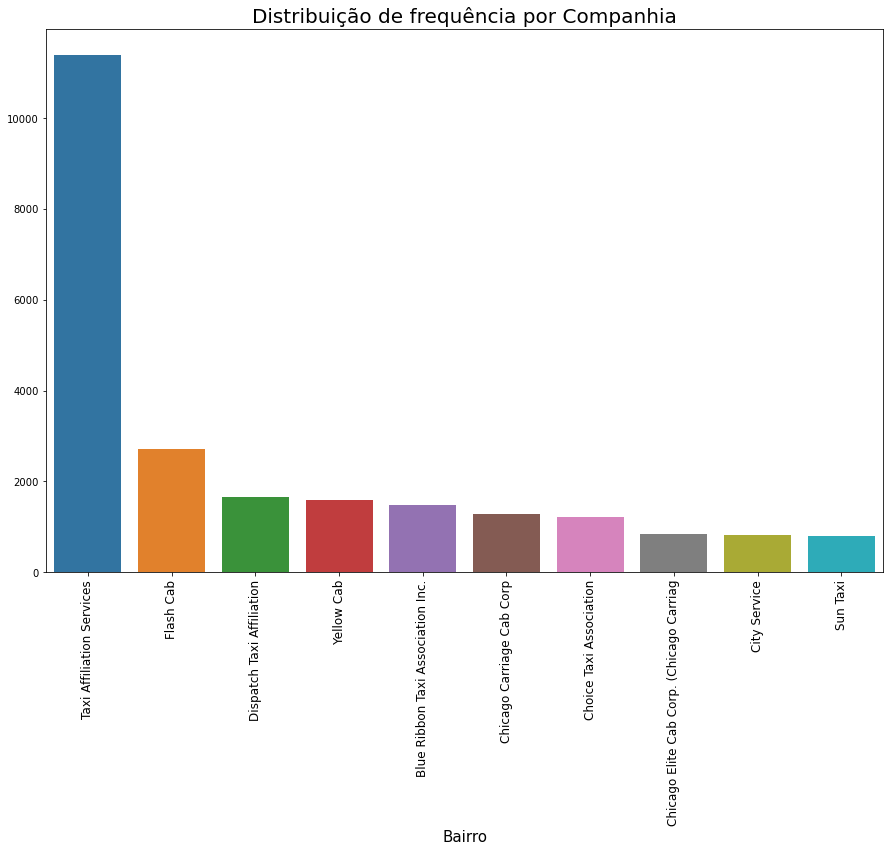

In [42]:

frequencia_companhias = taxi_sem_nulos['company'].value_counts().head(10)

plt.figure(figsize=(15,10)) # tamanho do gráfico
sns.barplot(x=frequencia_companhias.index, y=frequencia_companhias.values) # dados a serem apresentados

# ajustes no eixo x
plt.xticks(rotation=90, size=12) # rotação dos rotulos para melhor a legibilidade
plt.xlabel("Bairro", fontdict={"size": 15})

plt.title("Distribuição de frequência por Companhia", fontdict={'size': 20})

plt.show()

In [63]:
distancia = taxi_sem_nulos[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].copy()

In [72]:
distancia.drop('dropoff_longitude', axis=1, inplace=True)

In [73]:
distancia

,pickup_latitude,pickup_longitude,dropoff_latitude
0,,,
1,,,
2,,,
3,,,
4,,,
...,...,...,...
29995,,,
29996,,,
29997,,,
29998,,,


In [62]:
geopy.distance.distance((distancia['pickup_latitude'][1], distancia['pickup_longitude'][1]),(distancia['dropoff_latitude'][1], distancia['dropoff_longitude'][1])).km

0.0

In [58]:
distancia['distancia KM'] = geopy.distance.geodesic((distancia['pickup_latitude'], distancia['pickup_longitude']),(distancia['dropoff_latitude'], distancia['dropoff_longitude'])).km

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().